In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [110]:
# load preprocess datasets
path_to_pro = '../../data/processed/'
path_to_final = '../../data/final/'

wine_data = pd.read_csv(
    os.path.join(path_to_final, "wine_final.csv")
)

eto_data = pd.read_csv(
    os.path.join(path_to_pro, "eto_pro.csv")
)
meteo_data = pd.read_csv(
    os.path.join(path_to_pro, "meteo_pro.csv")
)

In [112]:
wine_data.columns

Index(['campana', 'id_finca', 'id_zona', 'id_estacion', 'altitud', 'variedad',
       'modo', 'tipo', 'color', 'superficie', 'produccion',
       'sup_tot_camp_finca', 'superficie_total', 'n_var_camp_finca',
       'prod_shift_1', 'prod_shift_2', 'prod_var_shift_1', 'prod_var_shift_2',
       'prod_finca_shift_1', 'prod_finca_shift_2',
       'prod_he_var_modo_mean_shift_1', 'prod_he_var_modo_std_shift_1'],
      dtype='object')

In [113]:
eto_data.columns

Index(['year', 'ID_ESTACION', 'GustLocalDayAvgMonth1', 'GustLocalDayAvgMonth2',
       'GustLocalDayAvgMonth3', 'GustLocalDayAvgMonth4',
       'GustLocalDayAvgMonth5', 'GustLocalDayAvgMonth6',
       'MSLPLocalDayAvgMonth1', 'MSLPLocalDayAvgMonth2',
       'MSLPLocalDayAvgMonth3', 'MSLPLocalDayAvgMonth4',
       'MSLPLocalDayAvgMonth5', 'MSLPLocalDayAvgMonth6',
       'RelativeHumidityLocalDayAvgMonth1',
       'RelativeHumidityLocalDayAvgMonth2',
       'RelativeHumidityLocalDayAvgMonth3',
       'RelativeHumidityLocalDayAvgMonth4',
       'RelativeHumidityLocalDayAvgMonth5',
       'RelativeHumidityLocalDayAvgMonth6', 'UVIndexLocalDayAvgMonth1',
       'UVIndexLocalDayAvgMonth2', 'UVIndexLocalDayAvgMonth3',
       'UVIndexLocalDayAvgMonth4', 'UVIndexLocalDayAvgMonth5',
       'UVIndexLocalDayAvgMonth6', 'VisibilityLocalDayAvgMonth1',
       'VisibilityLocalDayAvgMonth2', 'VisibilityLocalDayAvgMonth3',
       'VisibilityLocalDayAvgMonth4', 'VisibilityLocalDayAvgMonth5',
       'Visib

In [114]:
meteo_data.columns

Index(['ID_ESTACION', 'year', 'max_12_to_16_temp_month_1',
       'max_12_to_16_temp_month_2', 'max_12_to_16_temp_month_3',
       'max_12_to_16_temp_month_4', 'max_12_to_16_temp_month_5',
       'max_12_to_16_temp_month_6', 'min_1_to_5_temp_month_1',
       'min_1_to_5_temp_month_2', 'min_1_to_5_temp_month_3',
       'min_1_to_5_temp_month_4', 'min_1_to_5_temp_month_5',
       'min_1_to_5_temp_month_6'],
      dtype='object')

In [115]:
# join datasets
eto_data['year'] = eto_data.year%2000
meteo_data['year'] = meteo_data.year%2000

In [116]:
meteo_data[meteo_data['ID_ESTACION']==4]

,ID_ESTACION,year,max_12_to_16_temp_month_1,max_12_to_16_temp_month_2,max_12_to_16_temp_month_3,max_12_to_16_temp_month_4,max_12_to_16_temp_month_5,max_12_to_16_temp_month_6,min_1_to_5_temp_month_1,min_1_to_5_temp_month_2,min_1_to_5_temp_month_3,min_1_to_5_temp_month_4,min_1_to_5_temp_month_5,min_1_to_5_temp_month_6
32,4,15,18.30,20.182857,23.691429,24.177143,29.494286,35.54,-3.157143,-0.08,1.185714,3.494286,6.58,17.88
33,4,16,18.64,19.480000,23.740000,24.100000,29.580000,35.66,-1.820000,-2.92,0.420000,2.400000,3.78,11.56
34,4,17,16.06,17.760000,27.740000,26.600000,30.100000,36.76,-4.700000,-0.28,1.120000,3.660000,5.60,12.60
35,4,18,19.12,17.120000,23.100000,23.540000,25.340000,32.36,-1.260000,-3.66,-0.380000,4.040000,4.46,10.76
36,4,19,16.50,23.000000,24.220000,24.260000,27.940000,36.60,-4.980000,0.40,0.300000,5.140000,5.90,9.86
37,4,20,15.74,22.020000,27.040000,21.880000,31.320000,33.22,-2.000000,1.84,2.100000,4.680000,9.20,12.02
38,4,21,21.76,19.340000,21.620000,23.880000,30.400000,31.10,-3.860000,3.08,1.800000,4.000000,9.12,13.48
39,4,22,20.28,22.560000,18.380000,24.980000,31.780000,37.58,-3.480000,0.98,2.940000,0.540000,8.00,14.34


In [117]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campana                        8482 non-null   int64  
 1   id_finca                       8482 non-null   int64  
 2   id_zona                        8482 non-null   int64  
 3   id_estacion                    8482 non-null   int64  
 4   altitud                        8482 non-null   float64
 5   variedad                       8482 non-null   int64  
 6   modo                           8482 non-null   int64  
 7   tipo                           8482 non-null   int64  
 8   color                          8482 non-null   int64  
 9   superficie                     8482 non-null   float64
 10  produccion                     8482 non-null   float64
 11  sup_tot_camp_finca             8482 non-null   float64
 12  superficie_total               8482 non-null   f

In [118]:
meteo_full = eto_data.merge(
    meteo_data,
    left_on=['ID_ESTACION','year'],
    right_on=['ID_ESTACION','year'],
)

In [119]:
data_full = wine_data.merge(
    meteo_full,
    left_on = ["id_estacion","campana"],
    right_on = ['ID_ESTACION',"year"],
    how='left',
).drop(columns=['ID_ESTACION',"year"])

In [120]:
for col in eto_data.columns[2:].to_list() + meteo_data.columns[2:].to_list():
    data_full[col] = data_full.groupby(['id_estacion'])[col].transform(lambda x: x.fillna(x.mean()))


In [121]:
for col in eto_data.columns[2:].to_list() + meteo_data.columns[2:].to_list():
    data_full[col] = data_full[col].transform(lambda x: x.fillna(x.mean()))


In [122]:
data_test = data_full[data_full['campana']==22]
data = data_full[data_full['campana']<22] 

In [58]:
# Hay que sacar las variables "snow" en los meses de calor.

In [197]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import category_encoders as ce
from xgboost import XGBRegressor
from typing import List, Tuple
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GroupKFold, KFold
from sklearn.base import clone
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA


seed = 42

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(m, X, y, train_test_idx:List[Tuple[pd.Series,pd.Series]]):
    res = {
        "rmse":[],
        "mape":[],
    }
    for idxs in train_test_idx:
        m_ = clone(m)
        train_idx, test_idx = idxs[0], idxs[1]
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        m_.fit(X_train, y_train)
        y_pred = m_.predict(X_test)
        mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
        rmse = rmse_score(y_true=y_test, y_pred=y_pred)
        res['mape'].append(mape)
        res['rmse'].append(rmse)
    return res

In [124]:
# ce.TargetEncoder()
X = data.drop(columns="produccion")
y = data['produccion']

train_idx, test_idx =  X['campana']!=21, X['campana']==21
train_idx2, test_idx2 =  X['campana']!=20, X['campana']==20
train_idx3, test_idx3 =  X['campana']!=19, X['campana']==19
train_test_idx = [(train_idx, test_idx),(train_idx2, test_idx2), (train_idx3, test_idx3)]
print(X.shape, y.shape)

(8482, 105) (8482,)


In [132]:
wine_cols = [
    'campana', 'id_finca', 'id_zona', 'id_estacion', 'altitud', 'variedad',
    'modo', 'tipo', 'color', 'superficie',
    'sup_tot_camp_finca', 'superficie_total', 'n_var_camp_finca',
    'prod_shift_1', 'prod_shift_2', 'prod_var_shift_1', 'prod_var_shift_2',
    'prod_finca_shift_1', 'prod_finca_shift_2',
    'prod_he_var_modo_mean_shift_1', 'prod_he_var_modo_std_shift_1'
]

cat_cols = [
    'id_finca','id_zona',
    'id_estacion','variedad',
    "modo","tipo","color"
]

wine_num_cols = [c for c in wine_cols if c not in cat_cols]

eto_cols = X.columns[X.columns.str.contains("Month")].to_list()

meteo_cols = X.columns[X.columns.str.contains("month")].to_list()

X[cat_cols] = X[cat_cols].astype("category")

In [131]:
# baseline
m = make_pipeline(
    StandardScaler(), 
    LinearRegression()
)

eval_model(
    m = m,
    X = X[['superficie']],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [9301.270328414443, 9601.583672100132, 7263.362341116732],
 'mape': [14.455560644903619, 7.54826968037829, 4.96967430290028]}

In [133]:
m = make_pipeline(
    StandardScaler(), 
    LinearRegression()
)

eval_model(
    m = m,
    X = X[wine_num_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6496.638745574918, 7737.264556029171, 5844.789231759595],
 'mape': [3.670758381828157, 1.853205941334657, 1.5391139658141646]}

In [134]:
prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    StandardScaler(),
    LinearRegression()
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6313.7222500372145, 7571.54043904825, 5891.504395000854],
 'mape': [5.6721437451311525, 1.5958840269983308, 1.1009732864548607]}

In [200]:
prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    HistGradientBoostingRegressor(random_state = seed),
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [5403.634544439053, 6695.007176949311, 5637.674168705845],
 'mape': [7.284022856365273, 1.4289186466516182, 1.0006930755101213]}

In [206]:
prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1),
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [5867.798450358269, 7038.622024300515, 5477.030944068368],
 'mape': [7.977970759368507, 1.1563595709264327, 0.6604877973930205]}

In [201]:
# catboost model
eval_model(
    m = CatBoostRegressor(random_state=seed, cat_features=cat_cols, verbose=0),
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [5530.506830808185, 6577.88526499574, 5821.274444007417],
 'mape': [9.156778636070968, 1.2209020140706093, 0.9627206150675216]}

In [205]:
# xgboost model

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    XGBRegressor(random_state = seed),
)
eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6016.8526873776655, 7577.542849827114, 5870.10691389472],
 'mape': [5.640550052240371, 1.7180376134021036, 0.9504021923469776]}

In [215]:
from sklearn.neighbors import KNeighborsRegressor

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    KNeighborsRegressor(n_neighbors=5),
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6601.826409571929, 7544.80972883212, 6498.123963433654],
 'mape': [7.845563534661106, 5.0918598830984, 4.702880851195432]}

In [218]:
from sklearn.neural_network import MLPRegressor

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    (StandardScaler(), wine_num_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    MLPRegressor(random_state=seed, max_iter=10000),
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6540.085240781815, 7648.661744713675, 5902.299008766518],
 'mape': [4.905940921889032, 2.1783180594304556, 1.387151318455282]}

In [194]:
# eto features
m = make_pipeline(
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[eto_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [14438.284918168454, 19201.17022060342, 20394.414738993604],
 'mape': [53.23599615595804, 34.43494639475704, 27.237725171930613]}

In [137]:
# eto + wine features 

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[wine_cols+eto_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [8126.7350719957285, 8864.51839895626, 7208.844396466076],
 'mape': [34.15259499498535, 8.073101908411445, 7.345180029452527]}

In [195]:
# meteo features 

m = make_pipeline(
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[meteo_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [17977.073468400227, 25589.021568265856, 24523.03541150309],
 'mape': [58.85583692381014, 48.72058480975473, 33.72193791713251]}

In [196]:
# meteo + wine features 

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)


eval_model(
    m = m,
    X = X[wine_cols+meteo_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6193.404397197984, 7356.4904535750975, 5575.944564136866],
 'mape': [10.628825431753924, 4.485067569061306, 1.1713685674905905]}

<AxesSubplot: >

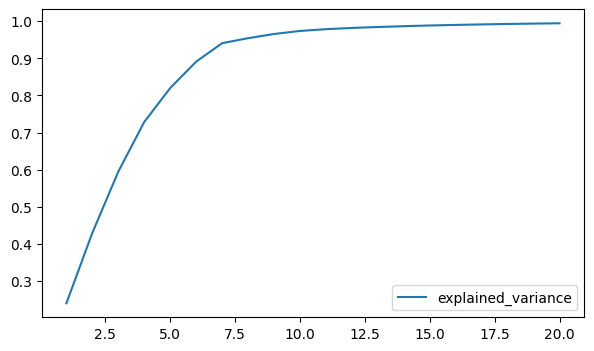

In [140]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[eto_cols+meteo_cols])

n_comps = 20
pca = PCA(n_components=n_comps)
pca.fit(
    X_scaled
)
pd.DataFrame(
    np.cumsum(pca.explained_variance_ratio_),
    index=range(1,n_comps+1),
    columns=['explained_variance']
).plot(figsize=(7,4))

In [141]:
prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    (PCA(n_components=7), meteo_cols+eto_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[wine_cols+meteo_cols+eto_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6500.220375931968, 11008.622626110264, 10014.759706097027],
 'mape': [12.027345217668566, 25.952987901848143, 16.8609413920196]}

# Feature Importance

In [160]:
id_cols = [
    'id_finca',
    'id_zona',
    'id_estacion'
]

ord_cols = [
    'modo', 
    'tipo', 
    'color'
]

rest_cat_cols = [
    'variedad'
]

prep = make_column_transformer(
    (ce.CountEncoder(), rest_cat_cols),
    (ce.QuantileEncoder(), rest_cat_cols),
    (ce.TargetEncoder(), rest_cat_cols),

    # (ce.GLMMEncoder(), id_cols),
    (ce.TargetEncoder(), id_cols),
    
    (make_pipeline(StandardScaler(), PCA(n_components=5)), meteo_cols+eto_cols),

    (StandardScaler(), wine_num_cols),
    # remainder='passthrough'
    remainder='drop'
)



m = make_pipeline(
    prep, 
    # CatBoostRegressor(random_state=seed,iterations=500, n_jobs=01)
    # XGBRegressor(random_state=seed, n_jobs=-1)
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

final_cols = wine_num_cols+id_cols+rest_cat_cols+meteo_cols+eto_cols+ord_cols
# final_cols = wine_num_cols+id_cols+rest_cat_cols+ord_cols

eval_model(
    m = m,
    X = X[final_cols],
    # X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [5863.390282479335, 6980.826124449359, 6138.0239198624795],
 'mape': [8.487034706248844, 1.2544664618294703, 0.9258556056394707]}

In [161]:
X_ = prep.fit_transform(X[final_cols], y)
rf = RandomForestRegressor(random_state=seed, n_jobs=-1).fit(X_, y)

In [162]:
fno = []
for t in prep.named_transformers_:
    if t !='remainder':
        fno+=[f"{t}_{c}" for c in prep.named_transformers_[t].get_feature_names_out()]

In [163]:
len(fno), X_.shape

(25, (8482, 25))

<AxesSubplot: >

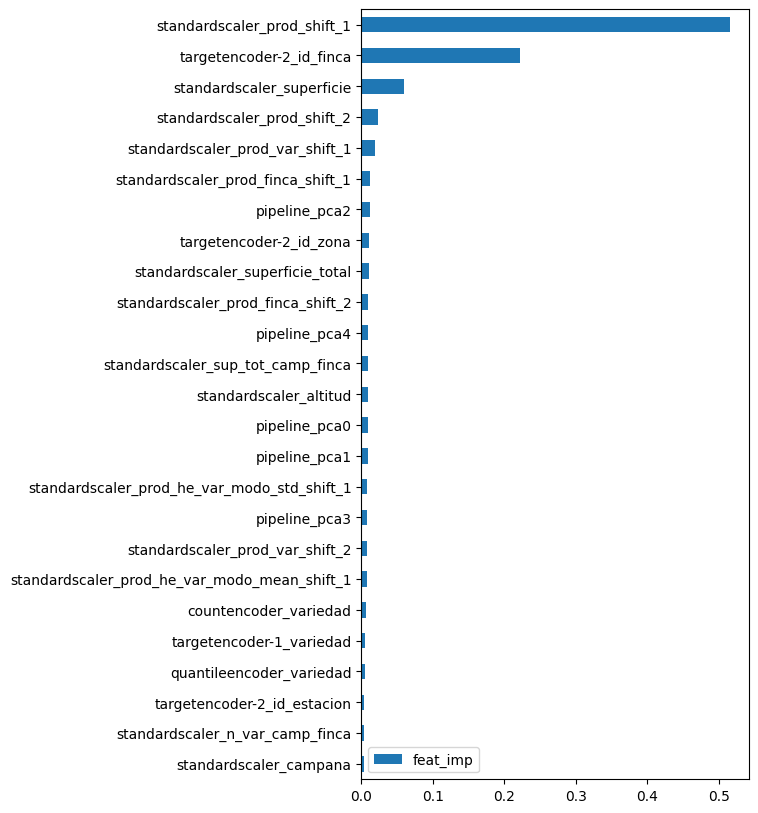

In [164]:
pd.DataFrame(
    rf.feature_importances_,
    index=fno,
    columns=['feat_imp']
).sort_values('feat_imp', ascending=True)[-30:].plot(kind='barh', figsize=(5,10))

<AxesSubplot: >

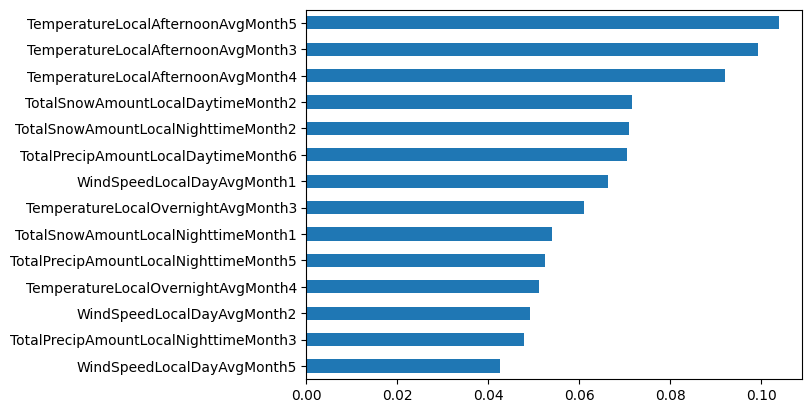

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.heatmap(
#     np.abs(pd.concat([X[eto_cols],y]).corr())
# )
# np.abs(pd.concat([X[eto_cols],y]).corr())>
# X[eto_cols],y
pd.concat([X[eto_cols],y],axis=1).corr().abs().iloc[:,-1].dropna().sort_values()[-15:-1].plot(kind='barh')

In [148]:
import shap
shap.initjs()

In [149]:
explainer = shap.TreeExplainer(rf)

X_sampled = X.sample(1000)

shap_values = explainer.shap_values(X_sampled)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


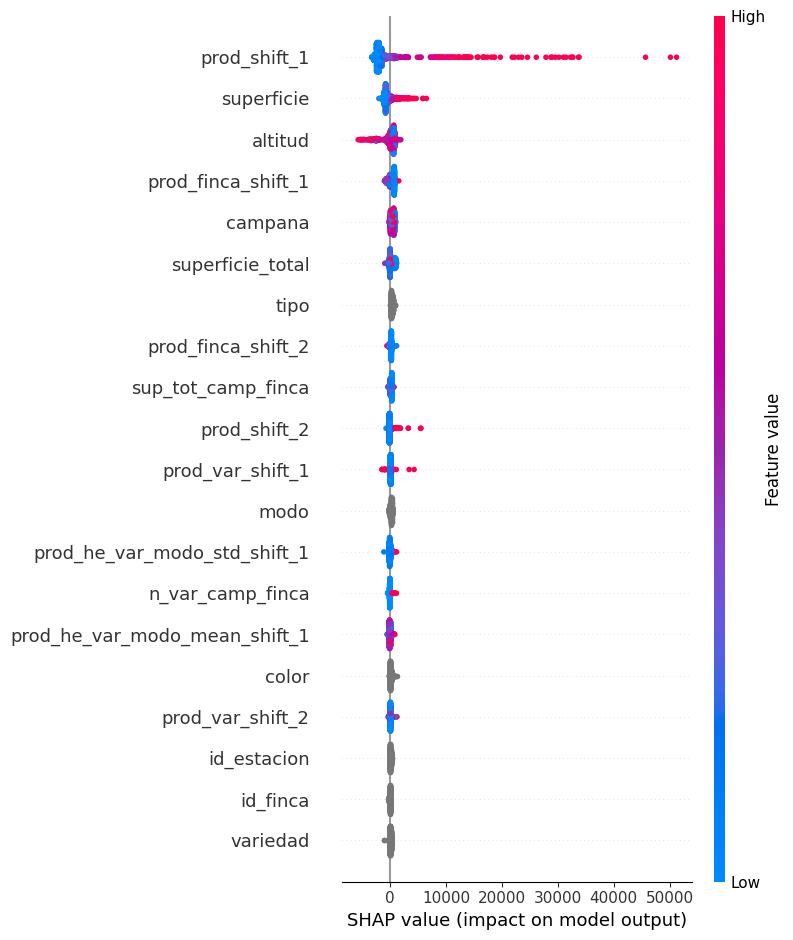

In [150]:
shap.summary_plot(shap_values, X_sampled)

In [419]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.mixed_linear_model.MixedLM.html

glmenc = ce.GLMMEncoder()
finca_trans = glmenc.fit_transform(X[['id_finca']], y)

x = X[['id_finca']] 
x['id_finca_enc']=finca_trans

